In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax

bias_path="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/bias_fit_on_signal_step2/"
uncorrected="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/final_model_step3_new/"
corrected="/srv/scratch/anusri/chrombpnet_paper/GM12878/ATAC_07.22.2021/final_model_step3_new/unplug/"


import numpy as np
from scipy.stats import entropy

In [2]:
pfile=bias_path+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


bias_pred_0_softmax=softmax(pred_0,axis=1)

pred_0_softmax=softmax(pred_0,axis=1)


['chr1', '804558', '.']


In [3]:
pfile=uncorrected+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


with_bias_pred_0_softmax=softmax(pred_0,axis=1)

pred_0_softmax=softmax(pred_0,axis=1)


['chr1', '804558', '.']


In [4]:
pfile=corrected+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
labels_1=f['lab_1'][:]
pred_0=f['pred_0'][:]
pred_1=f['pred_1'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])

unplug_pred_0_softmax=softmax(pred_0,axis=1)

['chr1', '804558', '.']


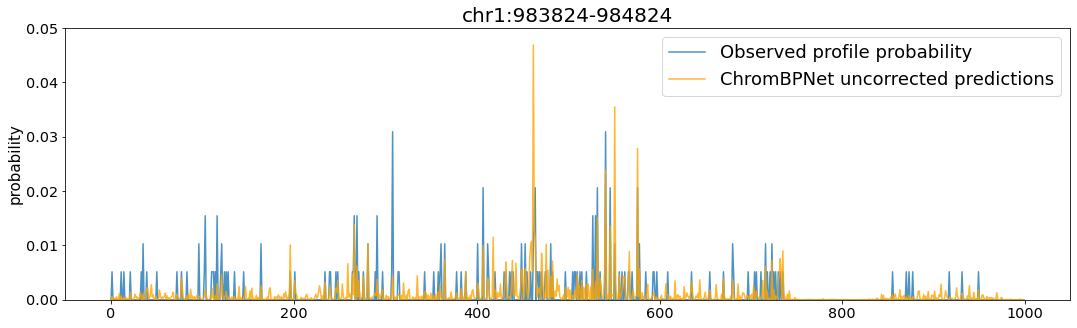

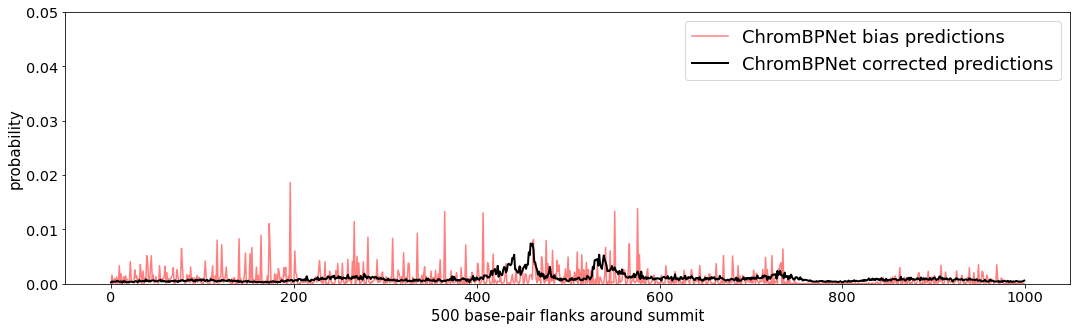

In [20]:
index=20
plt.figure()
plt.rcParams["figure.figsize"] = (18, 5) # (w, h)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.plot(labels_0[index,:]/sum(labels_0[index,:]), label="Observed profile probability", alpha=0.8)
plt.plot(with_bias_pred_0_softmax[index,:], label="ChromBPNet uncorrected predictions", alpha=0.8, color="orange")
#plt.plot(unplug_pred_0_softmax[index,:], label="ChromBPNet corrected predictions", color="k", linewidth=2)
plt.ylabel('probability',fontsize = 15) #xlabel
plt.title(coord_fixed[index][0]+":"+str(int(coord_fixed[index][1])-500)+"-"+str(int(coord_fixed[index][1])+500))
#plt.xlabel('500 base-pair flanks around summit', fontsize = 15)#ylabel
plt.legend(fontsize=18)
plt.ylim((0.00,0.05))
plt.show()

plt.figure()
plt.rcParams["figure.figsize"] = (18, 5) # (w, h)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
#plt.plot(labels_0[index,:]/sum(labels_0[index,:]), label="Observed profile probability", alpha=0.8)
plt.plot(bias_pred_0_softmax[index,:], label="ChromBPNet bias predictions", alpha=0.5, color="red")
plt.plot(unplug_pred_0_softmax[index,:], label="ChromBPNet corrected predictions", color="k", linewidth=2)
plt.legend(fontsize=18)
plt.ylabel('probability',fontsize = 15) #xlabel
plt.xlabel('500 base-pair flanks around summit', fontsize = 15)#ylabel
plt.ylim((0.00,0.05))
plt.show()

